In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size']=14
plt.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')
read1=pd.read_csv("E:\DATASETS\indian_food.csv")

read1

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [19]:
read1.name.value_counts()

Sambar            1
Chapati           1
Obbattu holige    1
Dal tadka         1
Chak Hao Kheer    1
                 ..
Koldil Chicken    1
Methi na Gota     1
Kansar            1
Cheera Doi        1
Poriyal           1
Name: name, Length: 254, dtype: int64

In [2]:
read1.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [3]:
read1.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [4]:
read1.drop(read1[read1.region.isnull()].index, inplace=True)

In [5]:
read1.diet.value_counts()

vegetarian        225
non vegetarian     29
Name: diet, dtype: int64

In [6]:
read1.shape

(254, 9)

# About Non-Vegetarian Items

In [7]:
col=read1[['name','diet','state','cook_time','region']]
col_fet=read1.diet=='non vegetarian'

In [8]:
dish=col[col_fet]
dish_df=dish.sort_values(by=['cook_time'],ascending=False).head(10)
dish_df

,name,diet,state,cook_time,region
75,Biryani,non vegetarian,Telangana,120,South
137,Beef Fry,non vegetarian,Kerala,60,South
247,Prawn malai curry,non vegetarian,West Bengal,50,East
80,Chicken Tikka masala,non vegetarian,Punjab,50,North
81,Chicken Tikka,non vegetarian,Punjab,45,North
235,Haq Maas,non vegetarian,Assam,40,North East
232,Chingri malai curry,non vegetarian,West Bengal,40,East
64,Maach Jhol,non vegetarian,Assam,40,North East
211,Vindaloo,non vegetarian,Goa,40,West
79,Chicken razala,non vegetarian,West Bengal,35,East


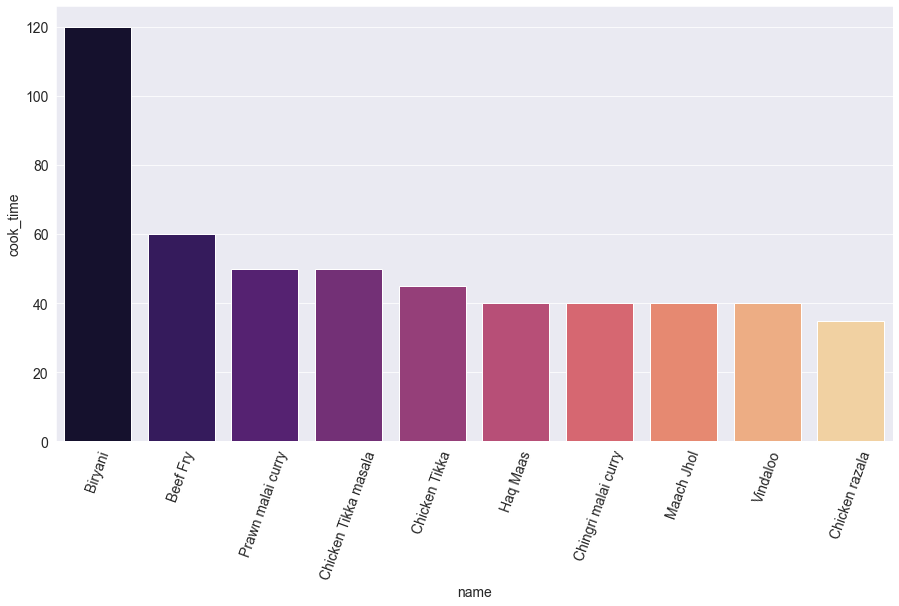

In [9]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 70)
sns.barplot(x='name',y='cook_time',palette='magma',data=dish_df)

Biryani Is Taking More Time For Cooking

# Which Non-Vegetarian Dishes Are Awailable In Goa City?

In [10]:
cit=read1[['state','name','prep_time','diet']]
cit_df=read1.state=='Goa'

In [11]:
goa=cit[cit_df]
goa_df=goa.sort_values(by=['prep_time'],ascending=False)
goa_df

,state,name,prep_time,diet
251,Goa,Bebinca,20,vegetarian
211,Goa,Vindaloo,10,non vegetarian
254,Goa,Pinaca,-1,vegetarian


In [12]:
Name11=goa_df.name
time=goa_df.prep_time

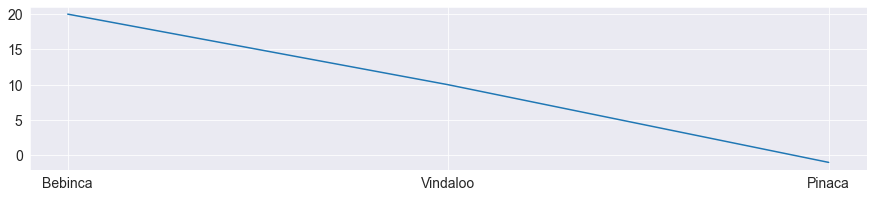

In [13]:
plt.figure(figsize=(15,3))
plt.plot(Name11,time)

In [14]:
cit=read1[['state','name','prep_time','diet','cook_time']]
cit_df=read1.state=='Punjab'

In [15]:
pun=cit[cit_df]
pun_df=pun.sort_values(by=['prep_time'],ascending=False).head()
pun_df

,state,name,prep_time,diet,cook_time
114,Punjab,Pindi chana,500,vegetarian,120
123,Punjab,Tandoori Fish Tikka,240,non vegetarian,30
122,Punjab,Tandoori Chicken,240,non vegetarian,30
81,Punjab,Chicken Tikka,120,non vegetarian,45
104,Punjab,Naan,60,vegetarian,30


In [16]:
new_df=pun_df[['name','diet','prep_time','cook_time']]
now=pun_df.diet=='non vegetarian'

In [17]:
nonveg=new_df[now]
nonveg_df=nonveg.sort_values(by=['prep_time'],ascending=False)
nonveg_df

,name,diet,prep_time,cook_time
123,Tandoori Fish Tikka,non vegetarian,240,30
122,Tandoori Chicken,non vegetarian,240,30
81,Chicken Tikka,non vegetarian,120,45


In [18]:
Name=nonveg_df.name
time1=nonveg_df.prep_time
time2=nonveg_df.cook_time

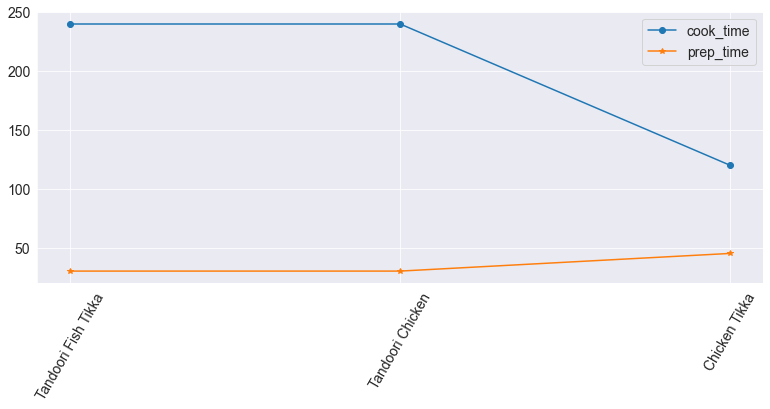

In [59]:
plt.figure(figsize=(13,5))
plt.xticks(rotation=60)
plt.plot(Name,time1,marker='o')
plt.plot(Name,time2,marker='*')
plt.legend(['cook_time','prep_time'])

# About Course

In [37]:
read1.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [38]:
we=read1[['name','region','course','prep_time']]
we_df=read1.region=='West'

In [39]:
part=we[we_df]
part_df=part.sort_values(by=['prep_time'],ascending=False)
part_df

,name,region,course,prep_time
1,Boondi,West,dessert,80
202,Sabudana Khichadi,West,snack,70
207,Surnoli,West,snack,60
218,Turiya Patra Vatana sabji,West,main course,35
212,Lilva Kachori,West,snack,30
...,...,...,...,...
216,Farsi Puri,West,snack,-1
172,Bombil fry,West,main course,-1
167,Kolim Jawla,West,main course,-1
187,Halvasan,West,dessert,-1


# Which Course Is Best In WEST Region?

In [40]:
cr=part_df.course.value_counts()
cr

main course    28
dessert        23
snack          23
Name: course, dtype: int64

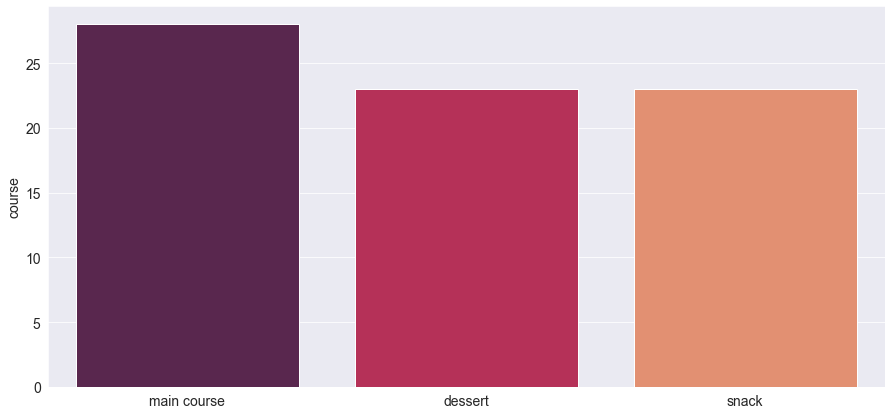

In [41]:
plt.figure(figsize=(15,7))
sns.barplot(x=cr.index,y=cr,palette='rocket')

# Let's Doing Analysis On Gujarat State

In [42]:
our=read1[['state','name','course','cook_time','prep_time','ingredients','diet']]
our_df=read1.state=='Gujarat'

In [43]:
stat1=our[our_df]
stat1_df=stat1.sort_values(by=['cook_time'],ascending=False)
stat1_df.head()

,state,name,course,cook_time,prep_time,ingredients,diet
209,Gujarat,Undhiyu,main course,60,25,"Sweet potato, surti papdi, baby potatoes, valo...",vegetarian
58,Gujarat,Doodhpak,dessert,60,10,"Milk, rice, sugar, dry fruits",vegetarian
197,Gujarat,Mohanthal,dessert,45,5,"Rose water, pistachio, badam, bengal gram flou...",vegetarian
192,Gujarat,Khandvi,snack,45,20,"Green chili paste, white sesame seeds, gram fl...",vegetarian
218,Gujarat,Turiya Patra Vatana sabji,main course,40,35,"Ridge gourd, baking soda, sugar, grated coconu...",vegetarian


In [44]:
stat1_df.course.value_counts()

snack          17
main course    12
dessert         6
Name: course, dtype: int64

In [45]:
start=stat1_df[['name','course']]
start_df=stat1_df.course=='starter'

In [46]:
mine=start[start_df]
mine_df=mine.sort_values(by=['name'],ascending=False)
mine

,name,course


In [47]:
new_df=stat1_df.head()
new_df

,state,name,course,cook_time,prep_time,ingredients,diet
209,Gujarat,Undhiyu,main course,60,25,"Sweet potato, surti papdi, baby potatoes, valo...",vegetarian
58,Gujarat,Doodhpak,dessert,60,10,"Milk, rice, sugar, dry fruits",vegetarian
197,Gujarat,Mohanthal,dessert,45,5,"Rose water, pistachio, badam, bengal gram flou...",vegetarian
192,Gujarat,Khandvi,snack,45,20,"Green chili paste, white sesame seeds, gram fl...",vegetarian
218,Gujarat,Turiya Patra Vatana sabji,main course,40,35,"Ridge gourd, baking soda, sugar, grated coconu...",vegetarian


In [48]:
Name1=new_df.name
timeA=new_df.cook_time
timeB=new_df.prep_time

Text(0, 0.5, 'PREP_TIME & Cook_Time')

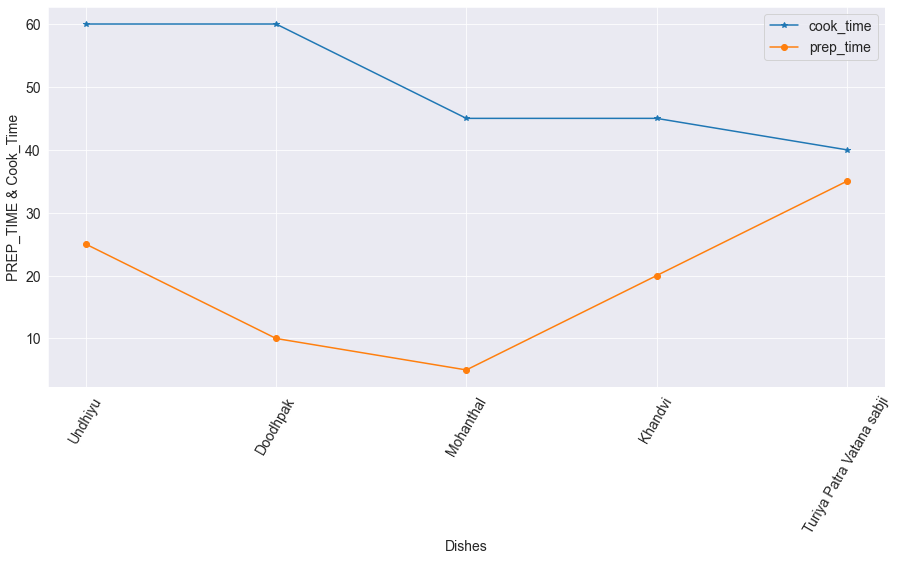

In [49]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
sns.set_style('darkgrid')
plt.plot(Name1,timeA,marker='*')
plt.plot(Name1,timeB,marker='o')
plt.legend(['cook_time','prep_time'])
plt.xlabel('Dishes')
plt.ylabel('PREP_TIME & Cook_Time')

In [50]:
our1=read1[['state','name','course','cook_time','prep_time','ingredients','diet']]
our1_df=read1.state=='Rajasthan'

In [51]:
stat12=our1[our1_df]
stat12_df=stat12.sort_values(by=['cook_time'],ascending=False)
stat12_df.head()

,state,name,course,cook_time,prep_time,ingredients,diet
83,Rajasthan,Daal baati churma,main course,90,10,"Moong dal, masoor dal, chana dal, wheat flour,...",vegetarian
219,Rajasthan,Churma Ladoo,dessert,40,12,"Whole wheat flour, khus khus, sesame seeds, dr...",vegetarian
1,Rajasthan,Boondi,dessert,30,80,"Gram flour, ghee, sugar",vegetarian
3,Rajasthan,Ghevar,dessert,30,15,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian
113,Rajasthan,Pattor,main course,30,10,"Arbi ke patte, sesame seeds, gur, bengal gram ...",vegetarian


In [52]:
NAME123=stat12_df.name
ctime=stat12_df.cook_time
ptime=stat12_df.prep_time

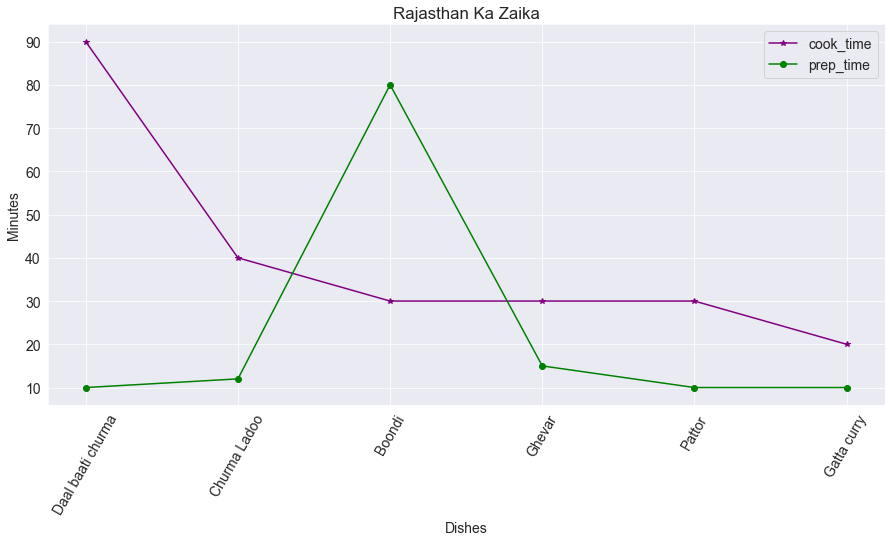

In [53]:
plt.figure(figsize=(15,7))
plt.title('Rajasthan Ka Zaika')
plt.xlabel('Dishes')
plt.ylabel('Minutes')
plt.xticks(rotation=60)
plt.plot(NAME123,ctime,marker='*',color='purple')
plt.plot(NAME123,ptime,marker='o',color='green')

plt.legend(['cook_time','prep_time'])

# Gujarat KA ZAIKA

In [23]:
guj=read1[['name','course','cook_time','prep_time','ingredients','diet']]
guj_df=read1.state=='Gujarat'

In [24]:
stat1=guj[guj_df]
stat1_df=stat1.sort_values(by=['cook_time'],ascending=False)
stat1_df

,name,course,cook_time,prep_time,ingredients,diet
209,Undhiyu,main course,60,25,"Sweet potato, surti papdi, baby potatoes, valo...",vegetarian
58,Doodhpak,dessert,60,10,"Milk, rice, sugar, dry fruits",vegetarian
197,Mohanthal,dessert,45,5,"Rose water, pistachio, badam, bengal gram flou...",vegetarian
192,Khandvi,snack,45,20,"Green chili paste, white sesame seeds, gram fl...",vegetarian
218,Turiya Patra Vatana sabji,main course,40,35,"Ridge gourd, baking soda, sugar, grated coconu...",vegetarian
189,Kansar,main course,40,10,"Wheat flour, cashews, rapeseed oil",vegetarian
168,Saath,main course,40,20,"Urad dal, potatoes, wheat flour, sooji",vegetarian
199,Patra,snack,40,10,"Arbi ke patte, sesame seeds, gur, bengal gram ...",vegetarian
191,Khakhra,snack,40,20,"Whole wheat flour, low fat, bengal gram flour",vegetarian
205,Namakpara,snack,35,10,"Wheat flour, baking soda, all purpose flour, b...",vegetarian


In [28]:
stat1_df.course.value_counts()

snack          17
main course    12
dessert         6
Name: course, dtype: int64

# Gujarati Snacks

In [29]:
main=stat1_df[['name','cook_time','prep_time']]
main_df=stat1_df.course=='snack'

In [30]:
snack=main[main_df]
snack_df=snack.sort_values(by=['cook_time'],ascending=False)
snack_df

,name,cook_time,prep_time
192,Khandvi,45,20
191,Khakhra,40,20
199,Patra,40,10
205,Namakpara,35,10
186,Handwo,30,20
215,Thepla,30,15
198,Muthiya,30,15
174,Chevdo,30,20
181,Dhokla,20,10
217,Khaman,20,10


In [31]:
na=snack_df.name
ctime=snack_df.cook_time
ptime=snack_df.prep_time

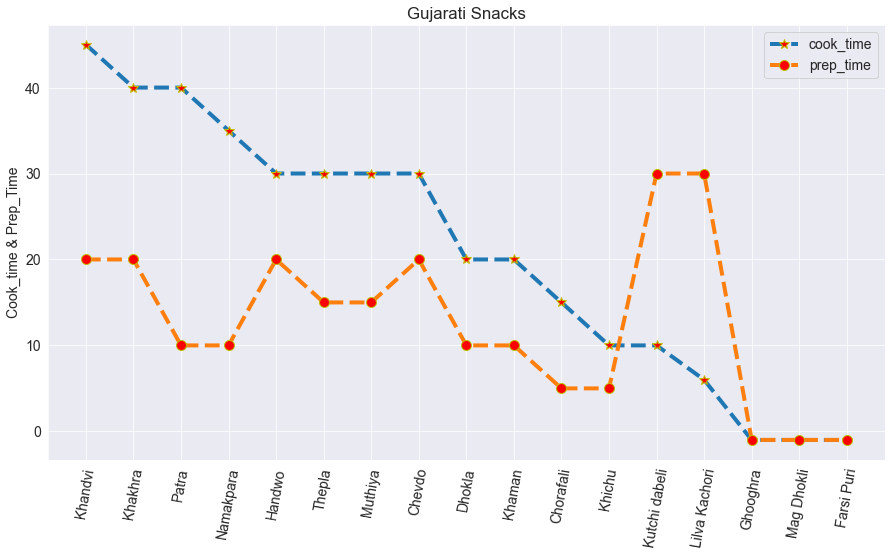

In [49]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=80)
plt.title('Gujarati Snacks')
plt.plot(na,ctime,marker='*',mfc='r',mec='y',markersize=10,linewidth=4,linestyle='--')
plt.plot(na,ptime,marker='o',mfc='r',mec='y',markersize=10,linewidth=4,linestyle='--')
plt.ylabel('Cook_time & Prep_Time')
plt.legend(['cook_time','prep_time'])

# Gujarati Main_Course

In [50]:
ma=stat1_df[['name','cook_time','prep_time']]
ma_df=stat1_df.course=='main course'

In [51]:
main_course=ma[ma_df]
main_course_df=main_course.sort_values(by=['cook_time'],ascending=False)
main_course_df

,name,cook_time,prep_time
209,Undhiyu,60,25
218,Turiya Patra Vatana sabji,40,35
189,Kansar,40,10
168,Saath,40,20
204,Sev tameta,30,20
188,Jeera Aloo,30,10
177,Daal Dhokli,30,20
196,Methi na Gota,30,15
176,Copra paak,30,20
203,Sev khamani,30,20


In [56]:
!pip install wordcloud --quiet
from wordcloud import WordCloud

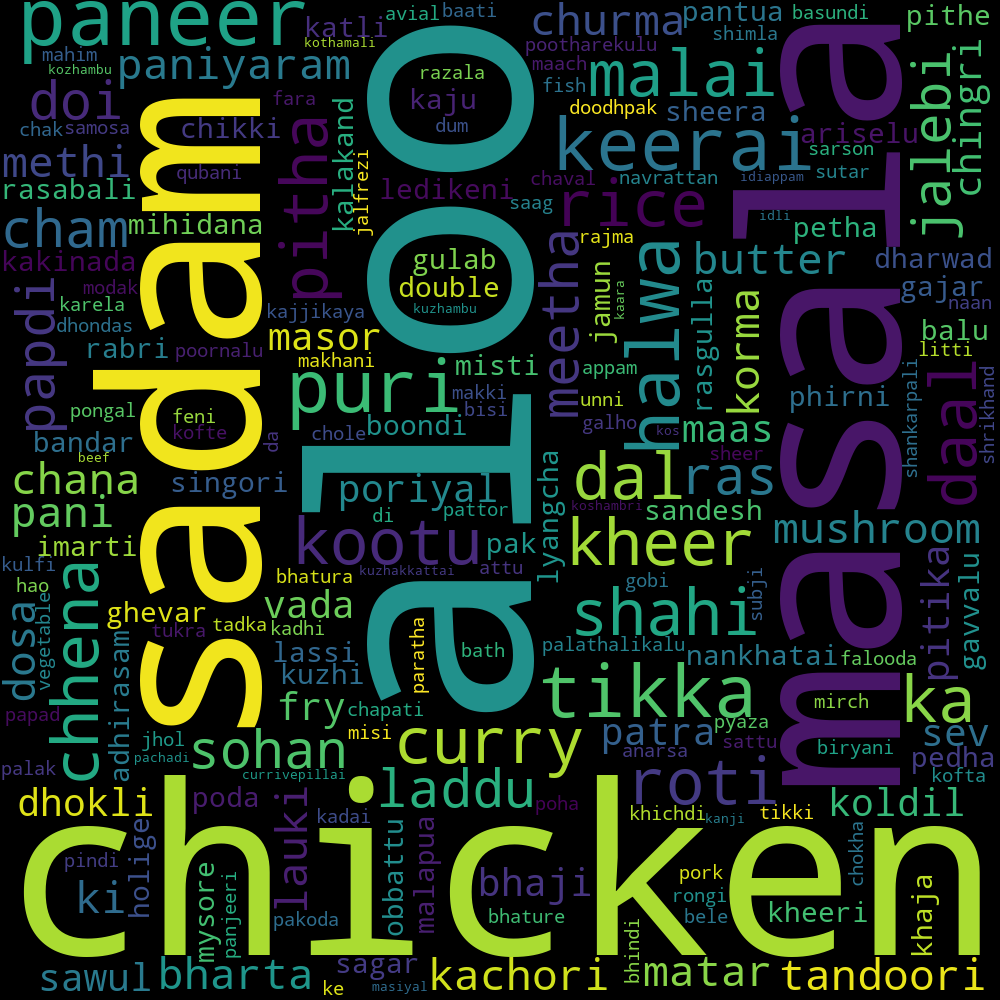

In [57]:
comment_words = ' '
  
for val in read1.name.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='black', 
                min_font_size = 10).generate(comment_words) 
wordcloud.to_image()